# 安徽安庆市项目`WRF-CMAQ`模拟分析
## 模拟结果分析：*`Process Analysis`*

---
*@author: Evan*\
*@date: 2023-08-08*

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from matplotlib import rcParams
config = {
    "font.family":'Times New Roman',
    "mathtext.fontset":'stix',
    "font.serif": ['SimSun'],
}
rcParams.update(config)

# silence the warning note
import warnings
warnings.filterwarnings("ignore")

import sys
sys.path.append('../../src/')
from findpoint import findpoint
import ModelEvaLib as me
from namelist import *

## 读取数据

In [2]:
pa = xr.open_mfdataset(pafile)

ncfile = pa.HADV_O3
HADV   = pa.HADV_O3
ZADV   = pa.ZADV_O3
HDIF   = pa.HDIF_O3
VDIF   = pa.VDIF_O3
DDEP   = pa.DDEP_O3
CHEM   = pa.CHEM_O3

In [3]:
siteloc = pd.read_excel('D:/data/Project_Anqing/安庆市站点坐标.xlsx',header=0,index_col=0)

sites = ['安庆大学','市人大','环科院','马山宾馆','安庆政务中心','高新区']

lono = siteloc[siteloc.index.isin(sites)]['经度']
lato = siteloc[siteloc.index.isin(sites)]['纬度']

print(lono,'\n',lato)

站点名称
安庆大学      116.9898
市人大       117.0597
环科院       117.0807
马山宾馆      117.0331
安庆政务中心    117.1150
高新区       116.9972
Name: 经度, dtype: float64 
 站点名称
安庆大学      30.6146
市人大       30.5351
环科院       30.5177
马山宾馆      30.5119
安庆政务中心    30.5337
高新区       30.5497
Name: 纬度, dtype: float64


In [4]:
x_index=[]
y_index=[]
for name in sites:
    out_x, out_y = findpoint(lono[name],lato[name],ncfile)
    x_index.append(out_x)
    y_index.append(out_y)

print(x_index)
print(y_index)

[72, 74, 75, 73, 76, 72]
[59, 56, 56, 56, 56, 57]


# Loop start from here

In [25]:
i=5 # i=0~5

HADV_sel = HADV.isel(x=x_index[i], y=y_index[i])
ZADV_sel = ZADV.isel(x=x_index[i], y=y_index[i])
HDIF_sel = HDIF.isel(x=x_index[i], y=y_index[i])
VDIF_sel = VDIF.isel(x=x_index[i], y=y_index[i])
CHEM_sel = CHEM.isel(x=x_index[i], y=y_index[i])
DDEP_sel = DDEP.isel(x=x_index[i], y=y_index[i])
HADV_sel.shape

(744, 38)

In [26]:
nlevel   = 28
datadict = {}
outdict  = {}
vars     = ['HADV','ZADV','HDIF','VDIF','CHEM','DDEP']

for var in vars:
    datadict[f"{var}_mean"] = np.mean(np.array(locals()[f"{var}_sel"][:,:nlevel]),0)
    outdict[f"{var}_pos"] = np.maximum(0,datadict[f"{var}_mean"])
    outdict[f"{var}_neg"] = np.minimum(0,datadict[f"{var}_mean"])

In [27]:
datadict['ZADV_mean']

array([ 42.538624 ,  11.597866 ,   1.3014436,  -2.2581937,  -4.4115934,
        -2.2006834,   1.1103538,   3.1197195,   5.560096 ,   8.919187 ,
        10.490768 ,   9.237588 ,   6.378979 ,   5.877319 ,   8.393811 ,
         6.928526 ,  -1.3818146,  -3.1715202,  -3.730072 ,  -8.059859 ,
       -10.554744 , -10.841036 ,  -4.269198 ,   1.4681562,   5.423833 ,
         0.6428575,  -2.8030167,  -4.336128 ], dtype=float32)

## 绘图

## 分时间段画图

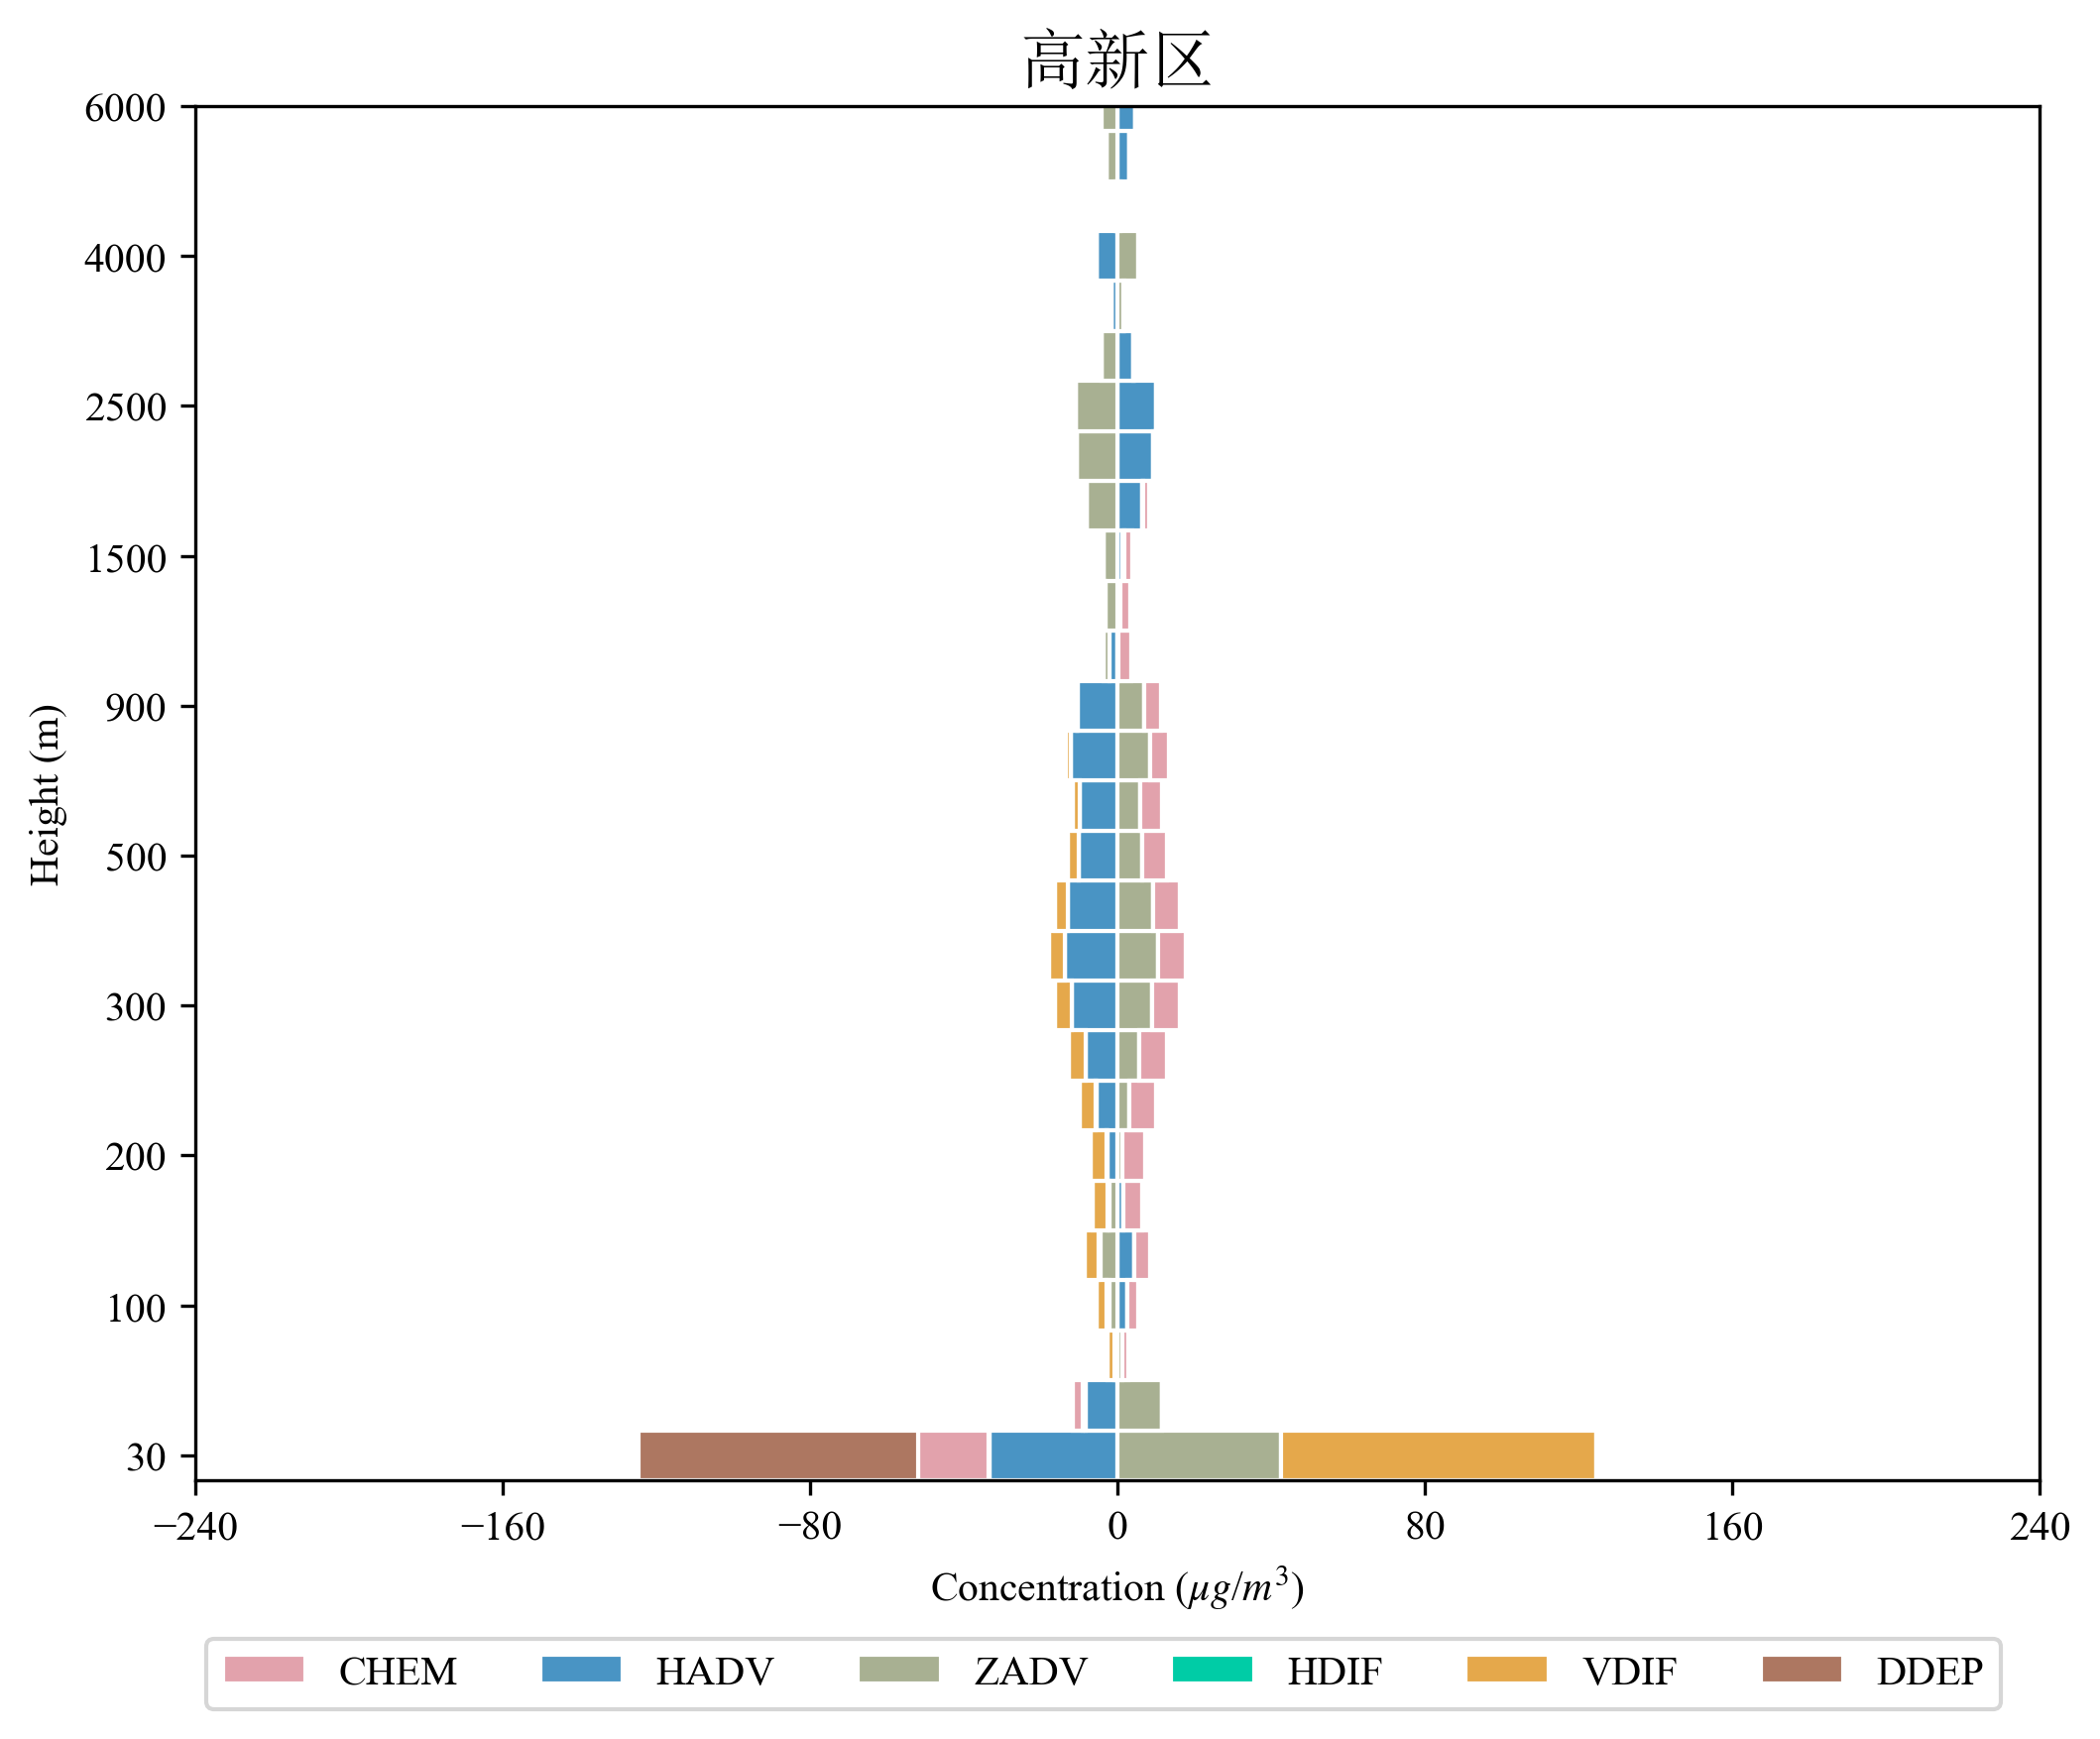

In [28]:
h   = np.arange(0,28)

edgec      = 'white'
color_hadv = '#4994c4'
color_zadv = '#a8b092'
color_hdif = '#00cca6'
color_vdif = '#e5a84b'
color_chem = '#e2a2ac'
color_ddep = '#ad7761'

fig = plt.figure(figsize=(8,6),dpi=300)
ax  = fig.subplots(1,1)

b1=ax.barh(h,outdict['HADV_pos'],color=color_hadv,height=1,edgecolor=edgec)
ax.barh(h,outdict['HADV_neg'],color=color_hadv,height=1,edgecolor=edgec)

b2=ax.barh(h,outdict['ZADV_pos'],color=color_zadv,left=outdict['HADV_pos'],height=1,edgecolor=edgec)
ax.barh(h,outdict['ZADV_neg'],color=color_zadv,left=outdict['HADV_neg'],height=1,edgecolor=edgec)

b3=ax.barh(h,outdict['HDIF_pos'],color=color_hdif,left=outdict['HADV_pos']+outdict['ZADV_pos'],height=1,edgecolor=edgec)
ax.barh(h,outdict['HDIF_neg'],color=color_hdif,left=outdict['HADV_neg']+outdict['ZADV_neg'],height=1,edgecolor=edgec)

b4=ax.barh(h,outdict['VDIF_pos'],color=color_vdif,left=outdict['HADV_pos']+outdict['ZADV_pos']+outdict['HDIF_pos'],height=1,edgecolor=edgec)
ax.barh(h,outdict['VDIF_neg'],color=color_vdif,left=outdict['HADV_neg']+outdict['ZADV_neg']+outdict['HDIF_neg'],height=1,edgecolor=edgec)

b5=ax.barh(h,outdict['CHEM_pos'],color=color_chem,left=outdict['HADV_pos']+outdict['ZADV_pos']+outdict['VDIF_pos']+outdict['HDIF_pos'],
            height=1,edgecolor=edgec)
ax.barh(h,outdict['CHEM_neg'],color=color_chem,left=outdict['HADV_neg']+outdict['ZADV_neg']+outdict['VDIF_neg']+outdict['HDIF_neg'],
            height=1,edgecolor=edgec)

b6=ax.barh(h,outdict['DDEP_pos'],color=color_ddep,left=outdict['HADV_pos']+outdict['ZADV_pos']+outdict['VDIF_pos']+outdict['HDIF_pos']+outdict['CHEM_pos'],
            height=1,edgecolor=edgec)
ax.barh(h,outdict['DDEP_neg'],color=color_ddep,left=outdict['HADV_neg']+outdict['ZADV_neg']+outdict['VDIF_neg']+outdict['HDIF_neg']+outdict['CHEM_neg'],
            height=1,edgecolor=edgec)

ax.set_xlim(-240,240)
ax.set_ylim(-0.5,27)
ax.set_xlabel('Concentration ($\mu$$g$/$m^3$)')
ax.set_ylabel('Height (m)')
ax.set_xticks(np.arange(-240,241,80))
ax.set_yticks(np.arange(0,28,3))
ax.set_yticklabels(['30','100','200','300','500','900','1500','2500','4000','6000'])
# ax.set_yticklabels(['1000','993','985','972','950','916','850','770','660','520'])

ax.legend((b5,b1,b2,b3,b4,b6),('CHEM','HADV','ZADV','HDIF','VDIF','DDEP'),bbox_to_anchor=(0.99,-0.1),ncol=6)
# ax.legend((b5,b1,b2,b3,b4,b6),('CHEM','HADV','ZADV','HDIF','VDIF','DDEP'),loc=2)
ax.set_title(sites[i],fontdict={'family':'SimSun','size':16})
plt.show()